# Overview of exercises:
1. Exploring with morphological operators (dilation, erosion, opening, closing, gradient, etc.). Using simple median / Gaussian filters, and using local thresholding for uneven background illumination.
2. 'Analyze particles' functionality in Python for nucleus sizes / cell sizes. Comparison with the same process in FIJI.
    - This is a standard example online and a good thing for everyone to get through.
3. Making a kymograph in Python. Making one in a better/easier/automatic manner in FIJI.
4. 3D watershed to reconstruct volume through pixel-counting (fully in Python). Instructions for doing the same in FIJI if time.

There are a few sections labeled '**Go further**' that suggest extensions to the main exercises. Please only spend time on these if you've finished everything else.

FIJI will be used occasionally, which requires you to download certain files from the QMW_files folder. These files are:
* (350 Mb) - 112419_EcadGFP_live_rotated_cropped_everyFourth.tif
* (6 Mb) - MAX_102918_clip170GFP_sqhCH_live_t153-243.tif
* (1 Mb) - AS_09125_050116030001_composite_RGB.tif
* (37 Mb) - 2021-01-09_Nup107GFP_Image2_downsampled2x_inXY.tif

Please begin downloading them now. It shouldn't take too long, but this will ensure they're downloaded by the time you need them.

In [1]:
# Connect to Google drive to access required data and images
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Only run this if you're having trouble with Plotly later, or if you didn't do the pre-work. Otherwise, these should already be installed and working.
%pip install wheel
%pip install plotly==5.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [3]:
# Import a bunch of libraries that will be useful for these exercises
import numpy as np
import cv2 # OpenCV, a library of computer vision tools - NOT included just by using Jupyter Notebook, but IS in Google Colab
import imutils # Helpful functions for image processing - NOT included just by using Jupyter Notebook, but IS in Google Colab
import matplotlib.pyplot as plt
import matplotlib.animation as animation # To play a movie
import plotly # Convenient plotting functions, helpful for working with 3D data and playing movies
import plotly.express as px
from skimage import measure # Several functions for image processing
from skimage import restoration as res # Contains a background-subtraction method we'll use briefly
import time # For timing execution of blocks of code
from skimage.morphology import watershed # Segmentation algorithm

%matplotlib inline
# To make displays nicer. Note: This causes FuncAnimation videos to fail to display in notebooks

## Exercise set #1 - Introduction to morphological operations (on binary images)

This exercise set includes:
- Applying a basic threshold to an image to generate a mask (basically, separate foreground from background)
- Applying dilations, erosions, openings, and closings to this mask. Before running the code, predict how the result will look for each operation.
- Using a couple of other methods for thresholding images.

Good reference (a Medium blog post) on morphological operations on grayscale images (instead of binary, like we're using here). The idea is exactly the same, but there are 256 possible values instead of 2:
https://himnickson.medium.com/morphological-operations-in-image-processing-cb8045b98fcc

### Step one - read in a test image. We'll use a default one from Python

In [4]:
from skimage import data # Some example datasets often used in Python
img = data.coins() # Grayscale image of some coins

#-----Display the image in grayscale using Matplotlib - hint: include cmap='gray' as the second argument-----


In [ ]:
#-----Display basic information (dimensions and bit depth) about the image-----
# (In reality, this would be known, especially if you acquired the data yourself)
print() # Image size (height x width - Numpy uses x as the number of rows and y as number of columns)
print() # Bit depth, which is the same as data type for NumPy arrays. Use the dtype function of NumPy

### Step two - threshold the image to produce a mask. We'll use Otsu's method

In [6]:
# Do some blurring/smoothing three ways. Any of these steps often leads to a better mask.
meanBlur = cv2.blur(img,(5,5)) # Blur based on average of pixels surrounding each given point in image
gaussBlur = cv2.GaussianBlur(img,(5,5),0) # Gaussian blur. '0' here automatically computes sigma (width of Gaussian), but can set it manually if preferred
medBlur = cv2.medianBlur(img,5) # Blur based on median of surrounding neighborhood

In [7]:
# -----Display the original image and the result of each blur-----
images = [] # Make a list of all four images
titles = [] # Give a name to each image
plt.rcParams['figure.figsize'] = [15, 15] # Can adjust image size by changing these values
for i in range(): # Loop through the list to make each image in a set of plots
    plt.subplot(,,), plt.imshow(images[i],'gray',vmin=0,vmax=255) # subplot() syntax: (nrows, ncols, index). Index runs from 1 to nrows*ncols
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([]) # Remove the tick marks Matplotlib automatically adds
plt.show()

SyntaxError: ignored

In [ ]:
# Threshold coin image to produce binary image - use Otsu's method to automatically set threshold
thresh, imgBin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # Outputs are threshold value and thresholded image, in that order
meanthresh, meanBin = cv2.threshold(meanBlur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
gaussthresh, gaussBin = cv2.threshold(gaussBlur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
medthresh, medBin = cv2.threshold(medBlur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = []
titles = []
plt.rcParams['figure.figsize'] = [15, 15]
for i in range():
    plt.subplot(,,),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Step three - create a kernel and perform operations

In [ ]:
#-----Create some 5x5 'kernels' for morphological operations-----
squareKern = ? # Square. Use np.ones for this, and make the data type uint8.
ellipseKern = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,?) # Slightly asymmetric, but nearly a circle. Fill in the size argument
crossKern = cv2.getStructuringElement(cv2.MORPH_CROSS,?) # A plus sign. Fill in the size argument

The cv2 library has functions for all the standard morphological operations. They are:
- cv2.dilate
- cv2.erode
- cv2.morphologyEx, with different second arguments corresponding to different operations
  - cv2.MORPH_OPEN
  - cv2.MORPH_CLOSE
  - cv2.MORPH_GRADIENT
  - cv2.MORPH_TOPHAT
  - cv2.MORPH_BLACKHAT

For dilation and erosion, the image is the first argument, and the kernel is the second. For morphologyEx, the second is the type of operation and the kernel is the third.

In [ ]:
#-----Choose one kernel shape and one of the above masks, then perform morphological operations-----
kernel = 
image = 

# Dilation - 'make it fatter'

# Erosion - 'make it thinner'

# Opening - erosion followed by dilation - note the different syntax

# Closing - dilation followed by erosion

# Gradient

# Top hat

# Black hat


### Step four - display results

In [ ]:
#-----Display results for everything-----

plt.rcParams['figure.figsize'] = [18, 8] # May have to adjust these for different screen sizes
images = [] # Fill this in for the nine images whose titles appear below
titles = ['Original', 'Thresholded', 'Dilation',
          'Erosion', 'Opening', 'Closing',
          'Gradient', 'TopHat', 'BlackHat']
for i in range():
    plt.subplot(,,),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Step five - make better masks using two other methods

In [ ]:
#-----Do a better threshold: Gaussian blur + local thresholding-----
gaussBlur = cv2.GaussianBlur(img,(5,5),0) # Apply a Gaussian blur to the original image, as we did earlier
# Use the below line of code to perform adaptive thresholding.
# Arguments are: image, threshold, style, invert, kernel size, tuning factor. Look up the function for details on each if you're curious
    # Leave the tuning factor at 4 for now. Adjust the kernel size and see what happens - you may need to make it fairly large
        # Note: kernel size must be odd
thresh = cv2.adaptiveThreshold(gaussBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, ?, 4)
plt.imshow(thresh,'gray')
plt.show()

In [ ]:
# Another improved way: background subtraction + morphological opening/closing

#-----Subtract a heavily blurred version of the image from itself. Try kernel sizes of ~150-300, keeping in mind they must be odd
cleaned = <Image> - <Background>
plt.imshow(cleaned)
plt.show() # Should end up with bright background and dim coins - think about why this is so and how to correct it for the line below
<code> # Otsu threshold the result from above such that the coins are bright and the background is dark

#-----Do some morphological operations to make it cleaner, then view the result to check-----


In [ ]:
#-----Fixing the uint8 weirdness (e.g. 4 - 6 = -2, but with uint8 it's 256 + (4 - 6) = 254 because negatives 'roll around' to 256)-----
cleaned16 = (img.astype(np.int16) - cv2.blur(img,(251,251)).astype(np.int16)) # Cast to 16-bit to allow negatives, then apply a very strong blur
  # Now do any adjustments needed to get back to 8-bit, threshold, etc. to get the mask.

**Go further** - write code to investigate and succinctly display the effects of changing kernel size on these outputs. Use a square kernel for ease, and choose a few different kernel sizes. Remember the image size when considering kernel sizes.


## Exercise set #2 - Make a kymograph to summarize a 3D movie in one 2D plot

This exercise includes:
- Reading in and working with a 3D image (x, y, time)
- Making a kymograph from the movie to visualize cell movement/growth - do this along the horizontal dimension
- Playing around with the line width used for the kymograph to see what happens

You'll be making a kymograph from data used in Imran Alsous et al. *PNAS* (2021). For biological context, below is a schematic of a fruit fly egg chamber, which is the sample included in the provided imaging data. It's not necessary to know this to make the kymograph, but it is helpful for interpreting the results.

A and P denote anterior and posterior directions. Fluid flows between cells from anterior to posterior, and the oocyte (Oo, gray) enlarges as the nurse cells (support cells, colored blue, red, green, or yellow here) tranport their contents to it and shrink. For convenience, these support cells can be grouped into 'layers' based on distance from the oocyte.

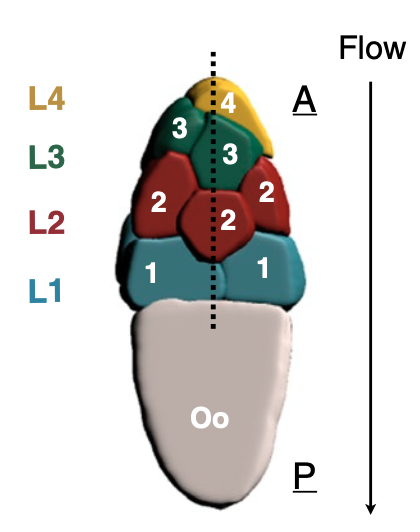

In [ ]:
# Useful information (from the imaging metadata)
dx = 0.8856 # Pixel spacing in x and y dimensions, in µm
dt = 15.19 # Time between frames of the movie, in seconds

In [ ]:
# Read in data - this is from a 3D image (x,y,time)
fname = '/content/gdrive/MyDrive/QMW_files/062419_sqhRFP_sfGFP_MIP_adjusted_sqhRFPonly_subsetInTime.tif'
ret, img2 = cv2.imreadmulti(fname, [], 0) # Image is the second output; the '0' argument means 'grayscale'
# Note that img2 is a list, not a numpy array. There are multiple ways to deal with that; choose one
# This image is 377 pixels in width, 205 pixels in height, and has 458 time points. Which dimension in img2 corresponds to which in the image?

In [ ]:
# Interactive plot, produced using Plotly library. Hover over image for actions: can zoom, pan, or download as PNG.
# CAREFUL dragging the slider to adjust frame. If done too quickly, the animation freezes and you must re-run the cell
vmin, vmax = img2.min(), img2[-100:-1,:,:].max() # Subset in time is because there's a bright spot in earlier frames
fig = px.imshow(
    img2[::5], # Step size of 5 'speeds up' movie - it takes a long time otherwise and breaks more easily
    zmin=vmin,
    zmax=vmax,
    animation_frame=0,
    binary_string=True,
    labels={'animation_frame': 'plane'}
)
# The following two lines increase animation speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
plotly.io.show(fig) # Anterior (pointy) end should be to the left if all went well

In [ ]:
#-----Define a horizontal line at middle of image. Try to write the code such that you can use a line of more than one pixel in width-----

#-----Make the kymograph. Let's be rigorous and convert from indices to time and distance along the axes-----
plt.imshow(?)
# Below lines are for formatting the ticks
distTicks = plt.xticks()[0] # Get the currently-used x ticks
distTicks = distTicks[distTicks>0] # Only keep those greater than zero...
distTicks = distTicks[distTicks<=theshape[2]] #...and less than the total length of the image
timeTicks = plt.yticks()[0] # Same process for y ticks
timeTicks = timeTicks[timeTicks>0]
timeTicks = timeTicks[timeTicks<=theshape[0]]

#-----Use plt.xticks and plt.yticks along with the metadata to correctly scale the time and distance axes-----

#-----Label the axes using plt.xlabel and plt.ylabel-----

plt.gcf().set_size_inches(15, 15) # Doesn't seem to work as expected, but it does change the size if adjusted enough
plt.show()

**Interpreting the kymograph**
1. About how much time passes between the start of the movie and the beginning of motion?
2. Can you tell in what order the four 'layers' of nurse cells shrink? These layers should be clearly visible from your kymograph.
3. 60 minutes into the movie, at approximately what speed is the oocyte's anterior edge moving forward? You can simply estimate this by eye, or you could try to find a way to accurately measure it if you're interested / have extra time.

**Go further** This dataset was adjusted beforehand to align horizontally. Think about how you would make the same type of kymograph for an image where the useful axis is at an angle (say $45^o$ - it's the easiest to visualize, and the same idea works for other angles). There are at least two different options to consider.

Here's the kymogrph used in the paper. It was created in FIJI instead of Python, used a subset of frames of the movie, and was also adjusted in contrast and colormap, so it will appear slightly different from yours. However, the general features should be the same.
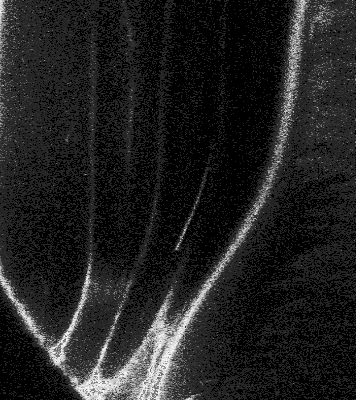

### Kymographs in FIJI

FIJI provides relatively easy methods to produce more complicated kymographs, including those along curved lines, at angles to the horizontal axis, using lines of different width, and even ones that update as you select locations on the image. We'll try some of those now.

#### Automatically-updating kymographs

This method takes advantage of a FIJI command meant for viewing z-stacks from three orthogonal views (e.g. top-down, side-on, and front-on).
- Open 112419_EcadGFP_live_rotated_cropped.tif, which is similar to the movie used above. It's ~1.4 GB, so if the file size is a problem, try 112419_EcadGFP_live_rotated_cropped_everyFourth.tif, which is just every fourth frame of that movie. This movie is 4D (xyzt) data, and by default, you get a view from the top down.
- Select 'Image > Stacks > Orthogonal Views' (Cmd + Shift + H if using a Mac). This opens the side and front views of the egg chamber. Adjust the slider to change frame, and see how the views change. When you're done, close the orthogonal views but leave the original image open.
- Now we lie to FIJI to get a kymograph. Select 'Image > Hyperstacks > Re-order Hyperstack ...' and flip the z and t dimensions.
- Open orthogonal views again. Since FIJI is reading the stack as xytz now, it's showing a view through time - a kymograph. Adjusting the z-position will update the kymograph, as will clicking on the image.

But this still requires the useful dimension be aligned with an axis of the figure. We could rotate an image such that the main axis is aligned properly, but there are other ways.

#### Kymographs along a defined line

FIJI lets you make kymographs along arbitrary lines (straight or curved) of different widths. Let's make a straight-line version first and adjust width to reproduce the above kymograph, then use a curved line.

Analyze > Multi Kymograph > Multi Kymograph should come included with the FIJI download, and it's easy to use.

Straight line version, using the same image as above:
- Click the 'line' button in the FIJI tool bar. Draw any line (for example, the anterior-posterior axis), then go to Analyze > Multi Kymograph > Multi Kymograph. Choose a line width, and a kymograph should pop up. Try a few different widths and see what happens.
- Double-click the 'line' button, and you should get a slider for line width. This lets you preview how thick a line will be for a given length.

Curved-line version, using MAX_102918_clip170GFP_sqhCH_live_t153-243.tif (use the second channel, where waves of myosin are visible):
- Right-click on the 'line' button and select 'Segmented Line'. Click a few points to make a set of connected line segments. To set a final point and finish drawing, right-click or double-click. Next to the line-width slider, click on 'Spline fit' to make your line curved if necessary. Try to make a kymograph where you can see the wave moving cyclically around the perimeter of one of the cells in the image.

## Exercise set #3 - Identify, segment, and measure sizes of cells/nuclei using 'regionprops'

This exercise includes:
- Separating nuclei from background using thresholding
- Associating a label to each individual nucleus ('connected-components labeling')
- Measuring properties from each nucleus, as well as number of nuclei (and hence number of cells, typically)

In [ ]:
# Read in an image to use. This one comes from an online database of cell images

fname = '/content/gdrive/MyDrive/QMW_files/40491_noise.tif' # Image from http://cellimagelibrary.org/images/40491
                                                            # Uhlen M. et al. Nat Biotech 2010
                                                            # Noise added using FIJI's 'Add Noise'/'Salt and Pepper'
dx = 0.0801 # Pixel spacing, in µm, for 40491_noise.tif

#-----Read in the image-----

#-----Because of a quirk of openCV, RGB images are read in as BGR (don't ask why, please...). Convert back to RGB so things display properly-----
# Hint: This just involves changing the order of the third dimension of the image. Remember to check the image dimensions if you're stuck

#-----Print the dimensions of the image, then display the image


We'll work with the DAPI (DNA label) channel. DAPI staining is a common way to locate cells within an organism/tissue, and it's often 'cleaner' (higher signal-to-noise ratio) relative to other labels. Plus, it's the easiest thing to use in these example images. In these images, the blue channel corresponds to DAPI.

Becuase this image is (artificially) noisy, we'll want to clean it up first. This can be done in various ways, including blurs or background subtraction functions before thresholding, but let's do the cleaning *after* thresholding this time.

In [ ]:
#-----Pull out DAPI channel and threshold it. This is similar to Exercise #1-----


In [ ]:
# There's some noise in the form of random bright pixels in the background. This can be fixed several ways.
# There is also a problem of holes and dark spots in the nuclei themselves. Again, several solutions exist.

#-----Morphological operation way: opening and closing-----


Note on kernel sizes and order of operations:
- Small bright spots to clear -> small kernel for opening
- Large holes to fill -> large kernel for closing
- Try this with the reversed order. It should end *badly* if the closing kernel is large and the opening is small.
    - To get a clear idea of why this fails, try a kernel size of 11 for closing and 3 for opening, in that order.
- What do you think will happen if the kernel size for closing is greater than the distance between nuclei? If unsure, try it!
    
An alternative approach to accomplish this cleanup: [scipy.ndimage.morphology.binary_fill_holes](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.morphology.binary_fill_holes.html) instead of the closing step. This is probably better, since it doesn't require you to choose a kernel size and is less likely to do unexpected things, but you'll have to import it. Don't worry about trying this out now unless you have extra time and are very curious about it.

Now you should have a mask clearly showing several nuclei. Let's get some numbers for them!

In [ ]:
#----Generate object labels and counts-----
labelarray = measure.label(cleaner) # Assigns a label to each clump of connected pixels

#-----Show the label array image. Each nucleus should be a different color-----

#-----Display more detailed data, using fancy print functions to make a rough table-----
print('There are {} nuclei.'.format(np.max(labelarray))) # This is a nice way to format output from print statements
props = measure.regionprops(labelarray) # Lots of properties, stored in a (number of nuclei)-element list
# The below line will give you a table heading. Look up print formatting for details as to what's going on, but briefly:
  # :<15 means the output corresponding to the brace will take up 15 spaces and will be left-justified
  # Each set of curly braces corresponds to one of the outputs in the .format() part. They match in order
  # A more complicated version would be "{:<15.1f}" - 15 spaces, left-justified, floating point output (the 'f'), and rounded to 1 decimal place (the .1)
print ("{:<15} {:<15} {:<15} {:<15} {:<15} {:<15} {:<10}".format('Nucleus','Size (pixels)', 'Area (µm^2)', 
                                                         'Centroid x','Centroid y','Angle (rad)','Aspect Ratio')) # Table headings
# Now loop through props and pull out the measurements listed above
# See https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops and scroll down to 'Notes' for the options
for prop in props:
    
    print("...")

**Going further**
1. This is a very simple example. Try using the human cell example (below) for a more complex one with smaller and more numerous nuclei. This is a case where it's actually helpful to automate nucleus counting, because counting all these cells by hand would be unpleasant.
  - The skeleton for this example is included below, but depending on time, consider skipping it and trying it later after doing it in FIJI and working on example #4.
2. If #1 was easy, try with the fruit fly (*Drosophila melanogaster*) cell examples (also below). These cells tend to clump more, so separating objects is harder.
    - This is likely a great time to use watershed segmentation (as in Exercise set #5), but in a different way than you'll use there. See https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html for more information on this approach.
3. Try this same process with the microtubule channel of the image, trying to get the cell size and orientation. This is a much less convenient label to find a cell body than something like a plasma membrane label or a free GFP, but it might be possible if the microtubules are dense enough.
    - You'll probably need to do some blurring before the thresholding step.

In [ ]:
# Examples taken from sample data at https://cellprofiler.org/examples/
    # None of these included metadata I could find, so the pixel spacing isn't known

# Human cells
fname_human = '/content/gdrive/MyDrive/QMW_files/AS_09125_050116030001_composite_RGB.tif'
dx = 1 # Placeholder since pixel spacing isn't specified

# Drosophila melanogaster cells
    # There are three different images here, each grayscale, showing only DAPI channel
fname_dmel_1 = '/content/gdrive/MyDrive/QMW_files/01_POS218_D.tif'
fname_dmel_2 = '/content/gdrive/MyDrive/QMW_files/01_POS002_D.tif'
fname_dmel_3 = '/content/gdrive/MyDrive/QMW_files/01_POS076_D.tif'
dx = 1 # Placeholder since pixel spacing isn't specified

In [ ]:
fname_human = '/content/gdrive/MyDrive/QMW_files/AS_09125_050116030001_composite_RGB.tif'
dx = 1 # Placeholder


In [ ]:
#-----Pull out DAPI channel and threshold-----

#-----Fix noise-----

#-----Fill holes (closing doesn't work because nuclei are too close together - why is this true?)-----
# Here's a trick for that
notHoles = cleaner_2.copy() # Make a copy to avoid changing the original. Not necessary here, but not bad practice for more complex scripts
mask = np.zeros((notHoles.shape[0]+2, notHoles.shape[0]+2), np.uint8) # Need to pass this to the flooding function. THe +2 is for padding purposes
cv2.floodFill(notHoles, mask, (0,0), 255) # Flood from [0,0], stopping at bright regions. This defines the background
holes = cv2.bitwise_not(notHoles) # Invert to get only holes inside cells
clean_2 = cleaner_2 | holes # | is the 'or' function to fill holes while keeping the original thresholded image

#-----Show results-----


In [ ]:
#-----Get object labels and counts, show label image, and print total number of nuclei-----


This should be decent, but it could be cleaner. For example, a distance-transform watershed (described below, in the context of FIJI) and exclusion of nuclei touching the edge of the image would make results better. Could also filter out spots that are clearly too large to be a single nucleus.

In [ ]:
#-----Get more detailed data using regionprops, with some summary statistics of size (a table would be unwieldy to read)-----

#-----Get the average nucleus size and orientation-----
# For fun: try to do this with a list comprehension. It can be done in one line for each measurement (e.g. size, orientation) rather than a for loop

#-----Make histograms to display the results. Give them titles and axis labels-----
# plt.hist is the function to use here. Give it just one argument: the list of nucleus size or orientation
# If we had the metadata, we would also need to convert sizes from square pixels to µm^2


### FIJI's version

Let's try the human cell example in FIJI.
- Open the image and extract the channel containing the nuclei.
- Threshold the image (with or without blurring or background subtraction first; up to you, but look at the image and consider whether blurring could introduce problems later on). Slect 'Image > Adjust > Threshold'. Try out different built-in thresholding algorithms to see what works best (though Otsu is still a good choice for this image).
- There will likely still be a few touching cells. One approach is a distance-transform watershed (explained in the link a couple cells back, but basically, it creats an image where each pixel's value is the distance from that pixel to the background, then uses local maxima in that image as seed points for watersheds). If you have the MorphoLibJ plugin installed, that's 'Plugins > MorphoLibJ > Binary Images > Distance-transform Watershed'. Leave the distance function as is and try adjusting the 'Dynamic' parameter, with and without the 'Normalize weights' box checked. Details on each option here: https://imagej.net/plugins/distance-transform-watershed
    - If you don't have MorphoLibJ, 'Process > Binary > Watershed' is a decent alternative, though you have no control over how it runs.
- 'Analyze > Analyze Particles' is FIJI's version of Python's 'regionprops' we used earlier. You can set minimum/maximum object sizes to exclude junk the threshold didn't catch or clumps of nuclei if you are okay losing a few nuclei. Circularity is how round the object is; 1 is a perfect circle, while long, thin objects approach 0.
    - You can choose how to display results. 'Display results' gives you a table of results, and you can choose what metrics to include in 'Analyze > Set measurements' before running this function. I like using 'Show Overlay Masks' to see what objects FIJI finds.
    - Whether you clear objects touching the edge depends on the application - e.g. counting nuclei, it's not necessary, but for measuring size, it is.

## Exercise set #4 - Use watershed segmentation to measure nucleus volume (in 3D) and look for patterns

This exercise includes:
- Working with 3D data of nuclear membranes
- Using the watershed technique to extract nucleus outlines
- Associating a volume to each nucleus
- Making a fun image - color-coding nuclei by their volume

Note: The original image is somewhat large and can lead to annoyingly long runtime for a couple of functions, especially if you're doing a lot of trial and error. For the purpose of this exercise, we'll use a version with half the x- and y-pixel density.

In [ ]:
# Metadata you'll need
dx = 0.3220 # Pixel spacing in µm in x,y dimensions
dz = 1 # Pixel spacing in z (often, dz > dx spacing in real data like this. Resolution is also worse in z than in x,y)

In [ ]:
# To get a handle on what we're looking at, read in the 3D data and make a projection of it through z dimension
fname = '/content/gdrive/MyDrive/Colab_Notebooks/QMW_files/2021-01-09_Nup107GFP_Image2_downsampled2x_inXY.tif' # 38 MB image
ret, img4 = cv2.imreadmulti(fname, [], cv2.IMREAD_ANYDEPTH) # We want to keep this 16 bit, hence the last argument
img4 = np.transpose(img4, [1,2,0]) # To get into format with z as the third dimension. Really just preference, but may affect behavior of functions down the line

#-----Make a projection of the data-----
# One way: make each pixel in x,y the maximum of all the pixels along the z-dimension. Another way: use the average instead of the maximum
# Again, the anterior end should be to the left if it read in and was projected correctly


In [ ]:
#-----Check that this is 16-bit data-----


In [ ]:
# Interactive plot - this is a larger dataset than before, so it can take a few seconds to run
vmin, vmax = img4.min(), img4.max()
fskip = 2 # Set to 1 to see whole stack; higher numbers mean seeing only a few slices. Use this in the line below starting with <Image> if you want; otherwise, can ignore this
fig = px.imshow(
    <Image>, # Requires [z,y,x] or [z,x,y] format, so be careful
    zmin=vmin,
    zmax=vmax/1.5, # Can adjust this to brighten/darken the image
    animation_frame=0,
    binary_string=True,
    labels={'animation_frame': 'plane'}
)
# The following two lines increase speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
plotly.io.show(fig)

Now we have our data and know what the nuclei look like. Time to segment them!

A common first step is to preprocess the image to make the watershed algorithm happier. If you like, skip the preprocessing and see how the algorithm does. Depending on the image, it might work, but some simple steps beforehand can greatly improve the likelihood you'll get good results.

In [ ]:
#-----Background subtraction using 'rolling ball' algorithm, as used in FIJI's 'Subtract Background' function-----
    # For this image, background subtraction has little obvious effect, so skip this if it's too slow to run
    # Python's version of this algorithm is slow compared to FIJI's. It took ~60-120 seconds on my laptop vs ~10 in FIJI.
    # Run this on a slice-by-slice basis (that is, on one xy-plane at a time)
    # Syntax: bgSlice = res.rolling_ball(image,radius=RADIUS). Try radii of ~30 for this image

? = np.copy(img4) # np.copy() because we don't want to change the original img4 itself when subtracting the background
start = time.time() # This will be slow, so it's worth timing to know when troubleshooting how long it will take
for i in range(?): # For each slice in z
  # Get the background
  
  # Subtract the background from the image
    
end = time.time()
print(end-start) # Elapsed time in seconds

# If this is taking forever to run, you can skip it - this particular dataset isn't too noisy, so it will probably still work

In [ ]:
#-----If you want, use Plotly to view the background-subtracted version. It's not too obviously different, though-----


In [ ]:
#-----Blur to suppress remaining noise and help fill small dark holes in the foreground. View a projection afterward to check your work-----
# Median or Gaussian blurs work well, but Gaussian blur might be harder to tune


Now for the watershed algorithm. In our data, it's not immediately obvious how to restrict flooding to objects representing the nurse cell nuclei; after all, there are many small nuclei belonging to other cells, plus autofluorescence from the oocyte. One could probably use more clever processing to extract only the sixteen germline cell nuclear membranes, but there's a simpler way.

Watershed algorithms require one or more 'seed point(s)' from which to start flooding and stop when they reach 'high' enough regions (i.e. bright regions with darker regions outside). By using sixteen seed points, one per nurse cell nucleus and one for the oocyte nucleus, we restrict analysis to the nuclei of interest.

There's a FIJI plugin (MorphoLibJ) allowing a user to scroll through the stack and click on seed points, but I haven't found a way to do so in Python. That leaves us with the annoying manual approach, but I promise it's worth it!
- Use Plotly to look through the preprocessed stack.
- Note [x,y,z] coordinates of the seed points you want to use. Remember, the height comes before the width when viewing images. Multiple possible seeds can give very similar results, so these don't have to be perfect. If segmentation fails, sometimes moving the seed slightly will fix the problem.
- Use these coordinates to set seed points. Unfortunately, the function requires the marker matrix to be the same size as the image, so you'll need zeros everywhere BUT the seed points, with a different integer for each seed.
- Watershed flooding starts from local minima, which is convenient with this dataset. For something like segmenting bright, solid objects on a dark background, you'd need to invert the image first, or use a gradient operator to get object outlines.
- Because the algorithm takes a decent chunk of time each run, don't worry if a few nuclei are missed. This is often due to the data quality itself, not the seed selection.

In [ ]:
#-----Define your seeds-----
seeds = [[199,283,20], # Here's one seed point, as an example
         [ , , ], # Fill these in, or store the seed points differently if you prefer
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ],
         [ , , ]]
mark = np.zeros(np.shape(img4),np.uint8) # Matrix of zeros the same size as the image
# Now fill in the mark matrix with integers representing each seed


In [ ]:
#-----Check the seed matrix passes a few sanity checks-----
# Check 1: There should be one occurrence of each number 1 to 16. Can be done in one line since we know what 1+2+3+...+16 is

# Check 2: Look at each unique value in the mark matrix to ensure 1,2,3,...16 are all there (and nothing else besides 0 is there)
  # np.unique() is your friend here
  

In [ ]:
#-----Check your markers overlaid on preprocessed image-----
temp = <YOUR IMAGE>.copy() # Don't want to change pixels in your actual image to segment
for i in range(16):
    temp[(seeds[i][0]-5):(seeds[i][0]+5),(seeds[i][1]-5):(seeds[i][1]+5),(seeds[i][2]-5):(seeds[i][2]+5)] = np.max(medimg4)*1.5 # Make a big cube to see
vmin, vmax = 0, np.max(medimg4)
fig = px.imshow(
    <Image>,
    zmin=vmin,
    zmax=vmax,
    animation_frame=0,
    binary_string=True,
    labels={'animation_frame': 'plane'}
)
# The following two lines increase speed
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
plotly.io.show(fig)

In [ ]:
# Run the watershed segmentation
start = time.time()
labels = watershed(<YOUR IMAGE>, mark) # Each object is given one integer label (e.g. all pixels of '1' correspond to the same nucleus)
end = time.time()
print(end-start) # Elapsed time in seconds - took ~30s with this version of the algorithm, using the downsampled image

# You may get a warning here. It's safe to ignore it, especially since the recommended version gave me the same results as this one but took ~4x as long

In [ ]:
#-----Another sanity check-----
# Make sure everything has a label from 0 to 16, inclusive. This can be another one-liner (hint: you know the total pixel number)
  # The core of this is what's known as a 'list comprehension'
# You can skip this if you're short on time


In [ ]:
#-----Get the number of pixels making up each object, including the background. Save this as a variable, and also print it to take a look-----


In [ ]:
#-----Check results - with my seed selection, the last two nuclei were missing - those appeared as '0' and '1' pixel objects in the above cell-----
vmin, vmax = 0, 16 # For display purposes
fig = px.imshow(
    <Image>, # Requires [z,y,x format]
    zmin=vmin,
    zmax=vmax,
    animation_frame=0,
    binary_string=True,
    color_continuous_scale=px.colors.sequential.Rainbow, # Not working, but one can set a colormap here, in theory
    labels={'animation_frame': 'plane'}
)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 30
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 5
plotly.io.show(fig)

**Something to think about** - When I did this, and often when I do this for other images, the nuclei in the last few z-slices fail in the segmentation. Considering how these images are acquired (live imaging, confocal fluorescence microscopy) and the physics of microscopy, why does the algorithm tend to fail most often on the last few nuclei?

In [ ]:
#-----Get measurements of nucleus size in physical units (i.e. not pixels), and determine which is the oocyte-----
# Step 1: Remove the list entry corresponding to the background (this is the largest number in the list - most pixels are background)
# Step 2: Get the volume of each 'voxel' (the volume version of a pixel). This comes from the image metadata
# Step 3: Convert pixel count (actually a voxel count) to volume in µm^3
# Step 4: Remove failed results from the list (think how one would identify them from pixel counts)
# Step 5: Print the results


In [ ]:
#-----For fun (and a challenge) - make an image with nuclei color-coded linearly by volume. This is messy, since watershed outputs don't 
    # match the order of marker numbers. Try regionprops again: those include a list of pixels for each object-----
outIm = np.zeros(img4.shape) # Use this to define the colorful nuclei


In [ ]:
#-----Display a maximum-intensity projection of results. I like including cmap='hot' as an argument for plt.imshow() for a nice color scheme-----

# If you want, find a way to save this as a tif/tiff and view it in FIJI

Notice any trend in nucleus size (hint: remember the layers from the egg chamber schematic)? Is the oocyte nucleus (which is much smaller than the nurse cell nuclei) obvious? If it isn't, something likely went wrong.

### FIJI's version

This process is easier in FIJI. Now that you understand how it works, try it out if you want to see if it's better or faster than the Python version above.
- Preprocessing: background subtraction using the rolling-ball method is under 'Process > Subtract background', and 'Process > Filters' provides several options for blurring.
- Watershed algorithm: 'Plugins > MorphoLibJ > Segmentation > Interactive Marker-controlled Watershed' is essentially what you did earlier, but more user-friendly.

## If you've finished all of the examples...
Good job!

Also, we have a lot of images you can try to segment using the above methods (or any others of your choice). Let one of us know if you'd like to explore with these images.